In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
arr_weather_combo = pd.read_csv('Departures_weather_combined.csv')
display(arr_weather_combo.head())

,Unnamed: 0,sched_dep_datetime (mod),dep_time,sched_dep_time,dep_delay,name,actual_delay,station,Wind Speed [in knots],Wind Gust [in knots],One hour precipitation [in inches],Pressure altimeter [in inches],Visibility [in miles],Sky Level 1 Coverage,Sky Level 2 Coverage,Sky Level 3 Coverage,Sky Level 4 Coverage
0,0,2013-01-01 05:51:00,05:58,06:00,-2.0,United Air Lines Inc.,5.0,JFK,11.0,NaN,0.00,29.89,10.0,5.0,NaN,NaN,NaN
1,1,2013-01-01 06:51:00,06:58,07:00,-2.0,Virgin America,0.0,JFK,11.0,NaN,0.00,29.90,10.0,5.0,NaN,NaN,NaN
2,2,2013-01-01 06:51:00,07:02,07:00,2.0,JetBlue Airways,46.0,JFK,11.0,NaN,0.00,29.90,10.0,5.0,NaN,NaN,NaN
3,3,2013-01-01 07:51:00,07:43,07:30,13.0,American Airlines Inc.,20.0,JFK,10.0,NaN,0.00,29.90,10.0,4.0,4.0,5.0,NaN
4,4,2013-01-01 08:51:00,08:29,08:30,-1.0,United Air Lines Inc.,-9.0,JFK,13.0,NaN,0.00,29.91,10.0,5.0,NaN,NaN,NaN


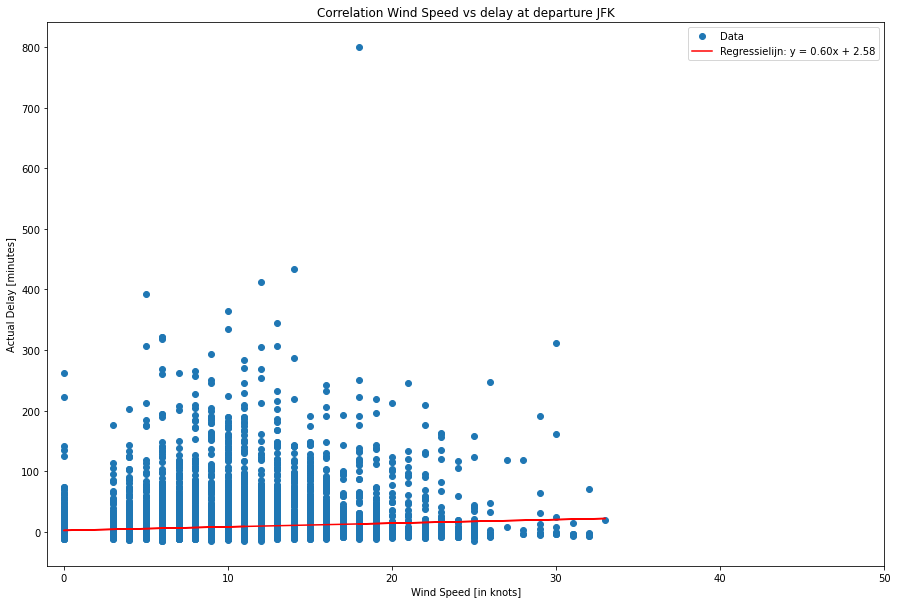

In [3]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['Wind Speed [in knots]'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
windspeed_clean = arr_weather_combo['Wind Speed [in knots]'][valid_mask]

m, b = np.polyfit(windspeed_clean, delay_clean,  1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(windspeed_clean, delay_clean, 'o', label='Data')
plt.plot(windspeed_clean, m*windspeed_clean + b, color='red', label=f'Regressielijn: y = {m:.2f}x + {b:.2f}')
plt.title('Correlation Wind Speed vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Wind Speed [in knots]')
plt.xlim(-1, 50)
plt.legend()
plt.show()

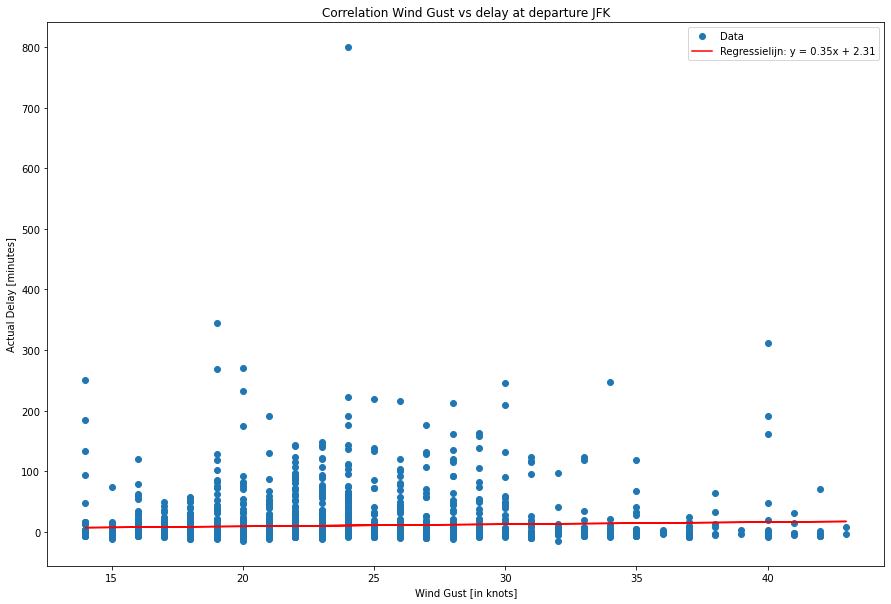

In [4]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['Wind Gust [in knots]'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
windgust_clean = arr_weather_combo['Wind Gust [in knots]'][valid_mask]

m, b = np.polyfit(windgust_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(windgust_clean, delay_clean, 'o', label='Data')
plt.plot(windgust_clean, m*windgust_clean + b, color='red', label=f'Regressielijn: y = {m:.2f}x + {b:.2f}')
plt.title('Correlation Wind Gust vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Wind Gust [in knots]')
plt.legend()
plt.show()

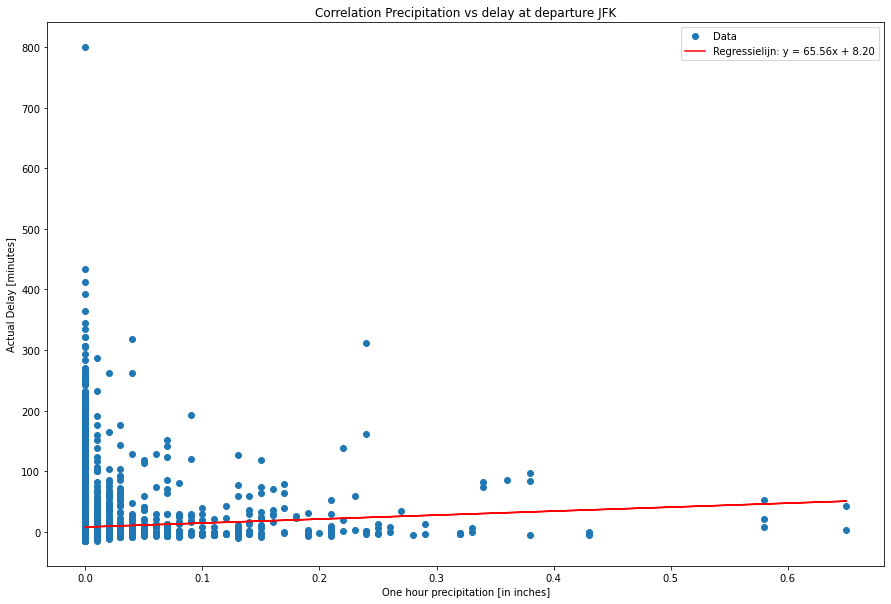

In [5]:
# As T is almost equal to zero, replace T to 0 so a regression line can be calculated
arr_weather_combo['One hour precipitation [in inches]'] = arr_weather_combo['One hour precipitation [in inches]'].replace('T', 0)
arr_weather_combo['One hour precipitation [in inches]'] = pd.to_numeric(arr_weather_combo['One hour precipitation [in inches]'], errors='coerce')

# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['One hour precipitation [in inches]'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
rain_clean = arr_weather_combo['One hour precipitation [in inches]'][valid_mask]

m, b = np.polyfit(rain_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(rain_clean, delay_clean, 'o', label='Data')
plt.plot(rain_clean, m*rain_clean + b, color='red', label=f'Regressielijn: y = {m:.2f}x + {b:.2f}')
plt.title('Correlation Precipitation vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('One hour precipitation [in inches]')
plt.legend()
plt.show()

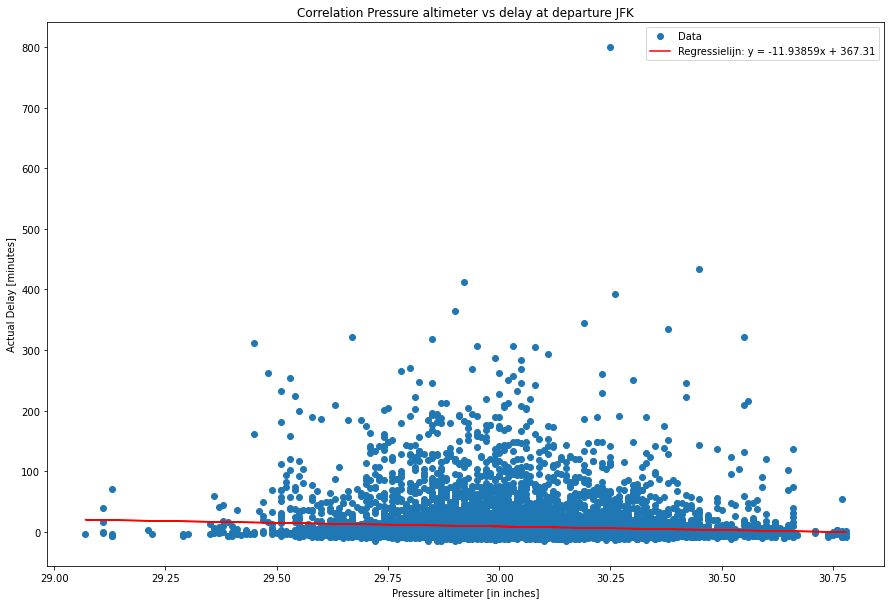

In [6]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['Pressure altimeter [in inches]'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
pressure_clean = arr_weather_combo['Pressure altimeter [in inches]'][valid_mask]

m, b = np.polyfit(pressure_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(pressure_clean, delay_clean, 'o', label='Data')
plt.plot(pressure_clean, m*pressure_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Pressure altimeter vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Pressure altimeter [in inches]')
plt.legend()
plt.show()

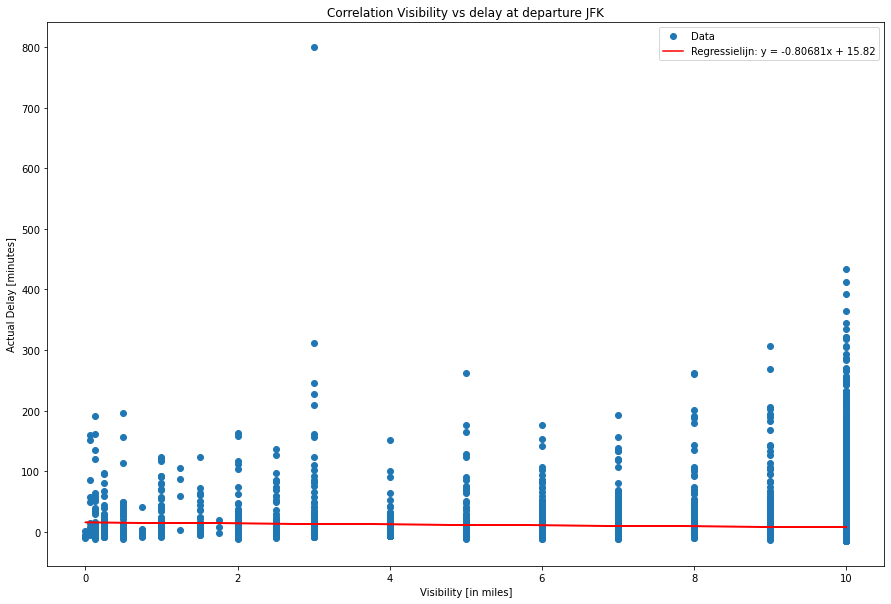

In [7]:

arr_weather_combo['Visibility [in miles]'] = arr_weather_combo['Visibility [in miles]'].replace(20, 10)

# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['Visibility [in miles]'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
vis_clean = arr_weather_combo['Visibility [in miles]'][valid_mask]

m, b = np.polyfit(vis_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(vis_clean, delay_clean, 'o', label='Data')
plt.plot(vis_clean, m*vis_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Visibility vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Visibility [in miles]')
plt.legend()
plt.show()

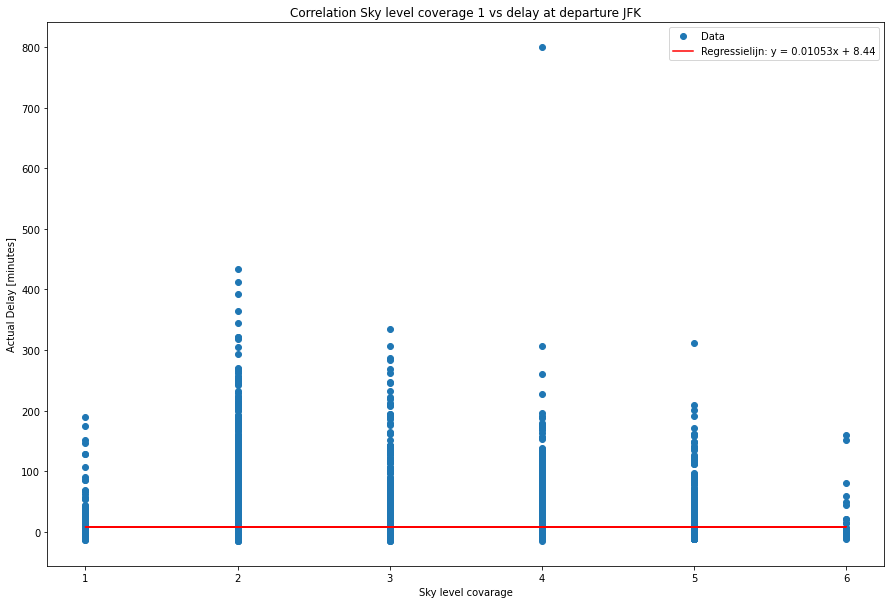

In [8]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['Sky Level 1 Coverage'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
sky1_clean = arr_weather_combo['Sky Level 1 Coverage'][valid_mask]

m, b = np.polyfit(sky1_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(sky1_clean, delay_clean, 'o', label='Data')
plt.plot(sky1_clean, m*sky1_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Sky level coverage 1 vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Sky level covarage')
plt.legend()
plt.show()

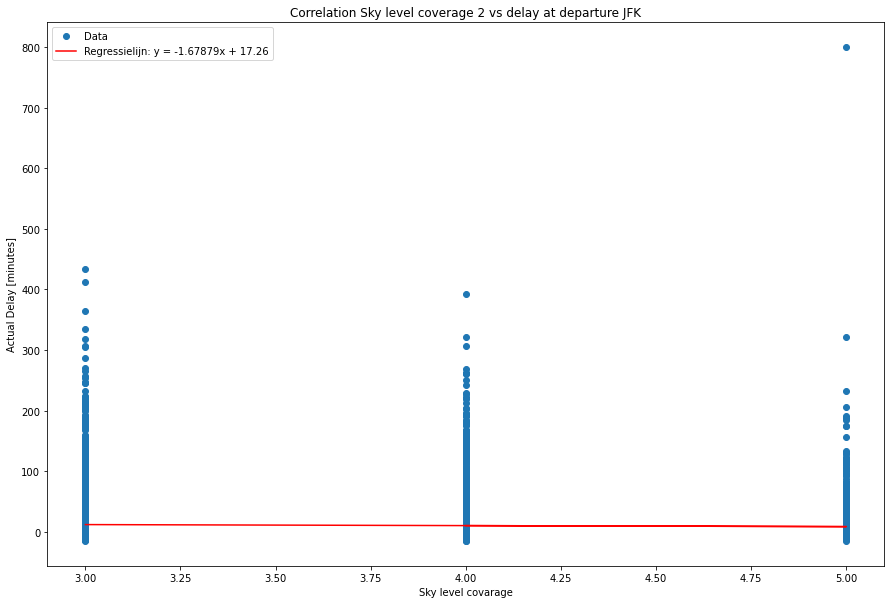

In [9]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['Sky Level 2 Coverage'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
sky2_clean = arr_weather_combo['Sky Level 2 Coverage'][valid_mask]

m, b = np.polyfit(sky2_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(sky2_clean, delay_clean, 'o', label='Data')
plt.plot(sky2_clean, m*sky2_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Sky level coverage 2 vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Sky level covarage')
plt.legend()
plt.show()

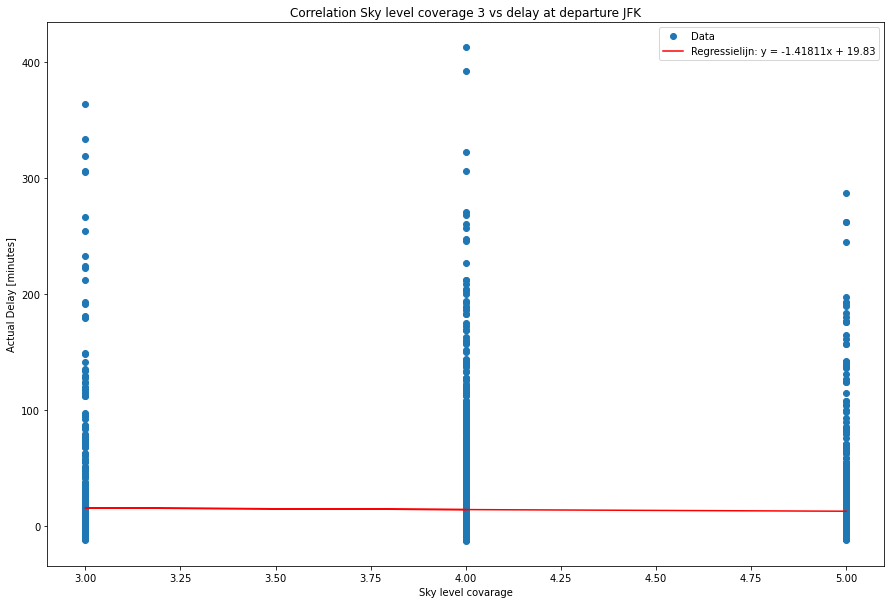

In [10]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['Sky Level 3 Coverage'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
sky3_clean = arr_weather_combo['Sky Level 3 Coverage'][valid_mask]

m, b = np.polyfit(sky3_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(sky3_clean, delay_clean, 'o', label='Data')
plt.plot(sky3_clean, m*sky3_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Sky level coverage 3 vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Sky level covarage')
plt.legend()
plt.show()

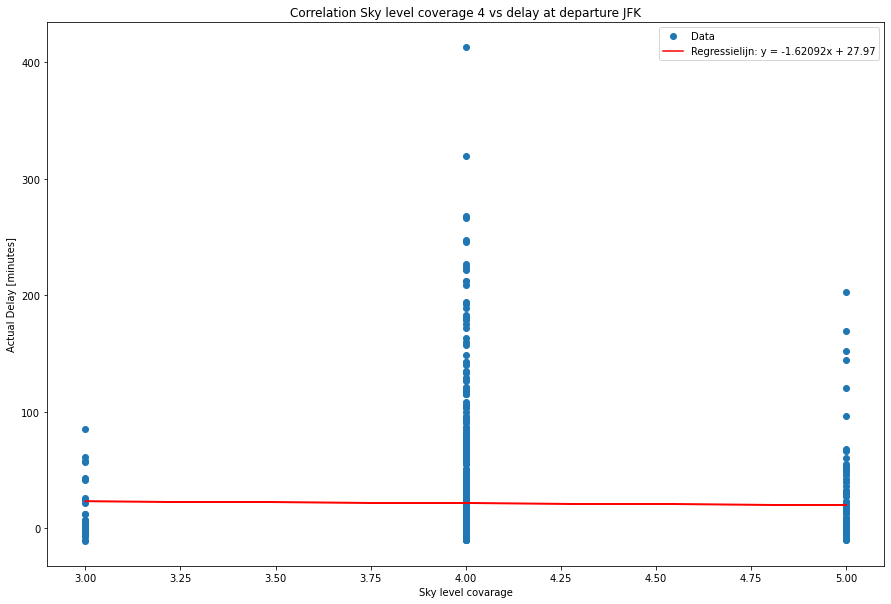

In [11]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['dep_delay']) & np.isfinite(arr_weather_combo['Sky Level 4 Coverage'])

# Calculating the regression line
delay_clean = arr_weather_combo['dep_delay'][valid_mask]
sky4_clean = arr_weather_combo['Sky Level 4 Coverage'][valid_mask]

m, b = np.polyfit(sky4_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(sky4_clean, delay_clean, 'o', label='Data')
plt.plot(sky4_clean, m*sky4_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Sky level coverage 4 vs delay at departure JFK')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Sky level covarage')
plt.legend()
plt.show()